# 01 Import Libraries

In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
import matplotlib as mpl

In [4]:
# Add the file directory to sys.path
results_dir = ''

# 02 Load NGS results

In [25]:
csv_file_path = results_dir + 'NGS_results_exact_2d_no_con.csv'
NGS_results_exact = pd.read_csv(csv_file_path)
num_grad_call_NGS_exact = np.array(NGS_results_exact['num_grad_call'])
num_func_eval_NGS_exact = np.array(NGS_results_exact['num_func_eval'])
sup_err_NGS_exact = np.array(NGS_results_exact['sup_err'])

# 03 Plot exact altogether

In [6]:
csv_file_path = results_dir + 'LSP_results_exact_fixed_basis_2d_no_con_basis_4.csv'
LSP_results_exact = pd.read_csv(csv_file_path)
num_itr_LSP_4 = np.array(LSP_results_exact['num_itr'])
sup_err_LSP_4 = np.array(LSP_results_exact['sup_err'])

In [7]:
csv_file_path = results_dir + 'LSP_results_exact_fixed_basis_2d_no_con_basis_9.csv'
LSP_results_exact = pd.read_csv(csv_file_path)
num_itr_LSP_9 = np.array(LSP_results_exact['num_itr'])
sup_err_LSP_9 = np.array(LSP_results_exact['sup_err'])

In [13]:
csv_file_path = results_dir + 'LSP_results_exact_fixed_basis_2d_no_con_basis_16.csv'
LSP_results_exact = pd.read_csv(csv_file_path)
num_itr_LSP_16 = np.array(LSP_results_exact['num_itr'])
sup_err_LSP_16 = np.array(LSP_results_exact['sup_err'])

In [17]:
csv_file_path = results_dir + 'LSP_results_exact_fixed_basis_2d_no_con_basis_25.csv'
LSP_results_exact = pd.read_csv(csv_file_path)
num_itr_LSP_25 = np.array(LSP_results_exact['num_itr'])
sup_err_LSP_25 = np.array(LSP_results_exact['sup_err'])

In [28]:
csv_file_path = results_dir + 'LSP_results_exact_boosted_2d_no_con.csv'
LSP_results_exact_boosted = pd.read_csv(csv_file_path)
num_grad_call_LSP_boosted = np.array(LSP_results_exact_boosted['num_grad_call'])
num_func_eval_LSP_boosted = np.array(LSP_results_exact_boosted['num_itr'])
sup_err_LSP_boosted = np.array(LSP_results_exact_boosted['sup_err'])

In [20]:
csv_file_path = results_dir + 'LSP_results_exact_boosted_breaks_2d_no_con.csv'
LSP_results_exact_boosted_breaks = pd.read_csv(csv_file_path)
breaks = np.array(LSP_results_exact_boosted_breaks['break_grads'])

C:\Users\dongq\AppData\Local\Temp\ipykernel_14400\1083699611.py:34: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(0, )


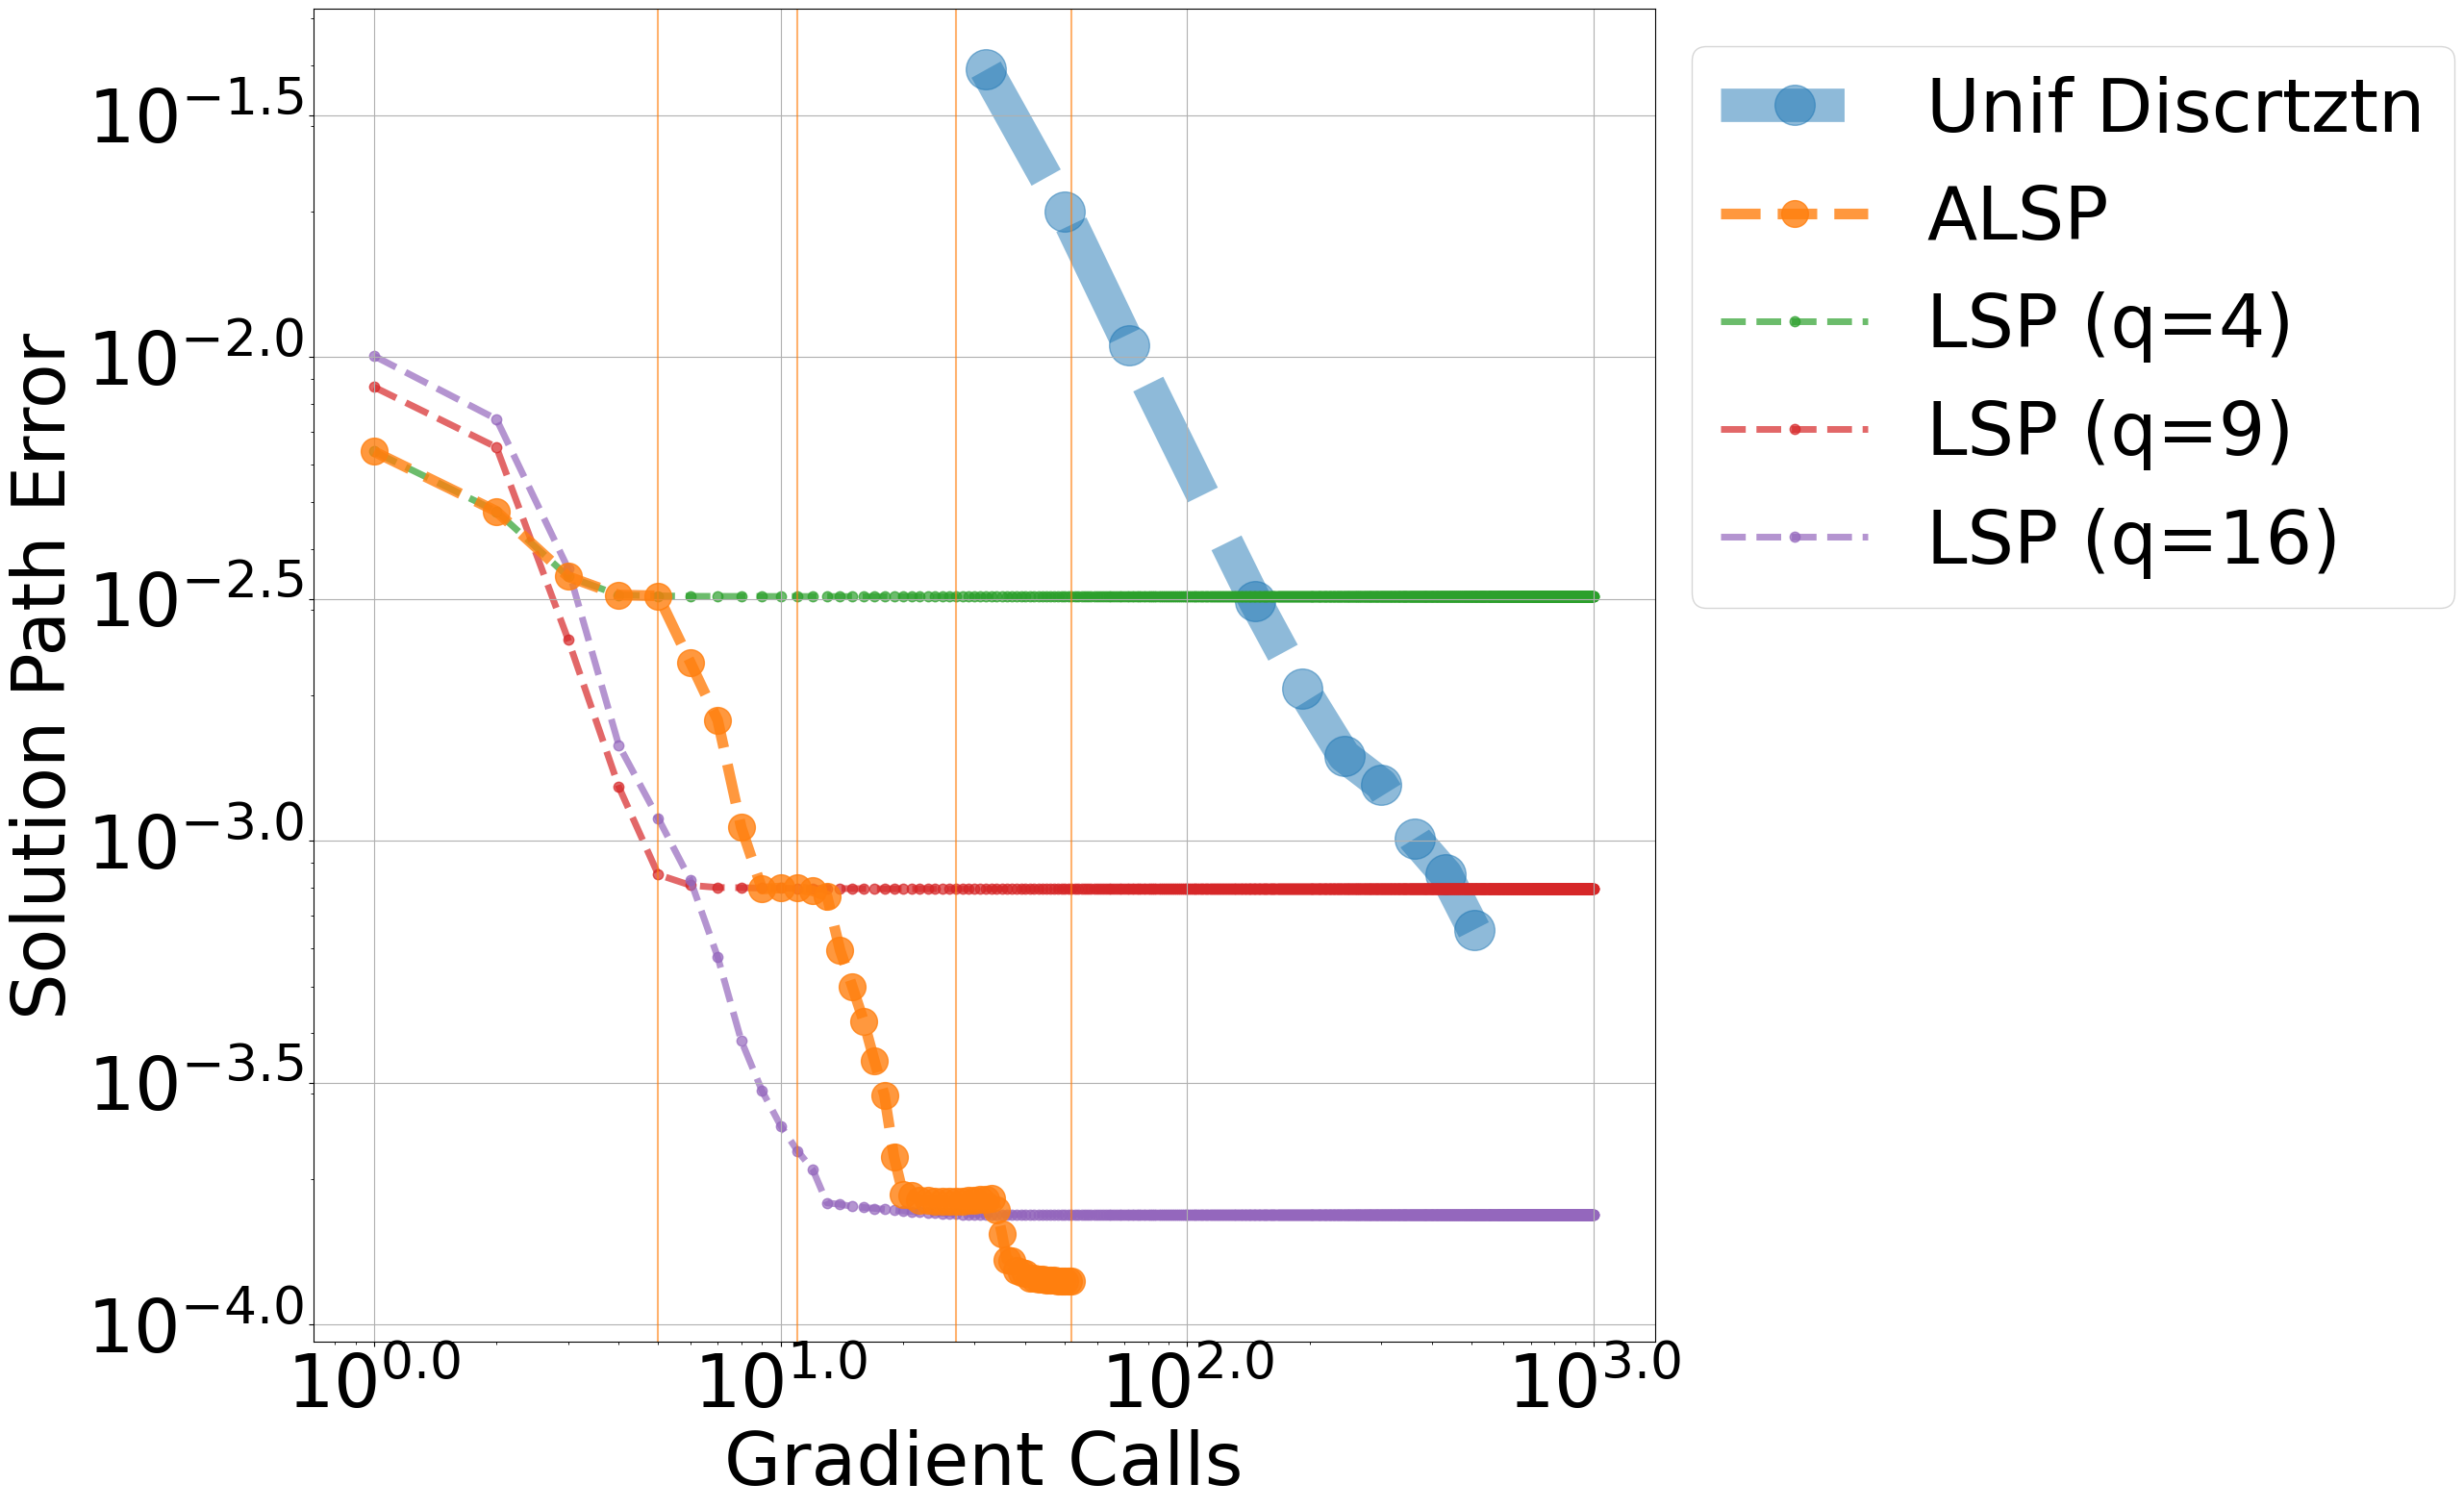

In [26]:
# plot result of learning the solution path for every 100 gradient calls
plt.figure(figsize=(18,18))
plt.plot((num_grad_call_NGS_exact[:len(num_grad_call_NGS_exact)-6]), (sup_err_NGS_exact[:len(num_grad_call_NGS_exact)-6]), '--o', linewidth=25, markersize=30, label = "Unif Discrtztn", alpha=0.5, zorder=0)
for break_itr in breaks:
    plt.axvline(x = break_itr, color='tab:orange', alpha=0.6, zorder=2)
plt.plot((num_grad_call_LSP_boosted), (sup_err_LSP_boosted), '--o', linewidth=8, markersize=20, label = "ALSP", alpha=0.8, zorder=2)

plt.plot(np.arange(1, len(num_itr_LSP_4)+1), (sup_err_LSP_4), '--.', linewidth=5, markersize=15, label = "LSP (q=4)", alpha=0.7, zorder=1)
plt.plot(np.arange(1, len(num_itr_LSP_9)+1), (sup_err_LSP_9), '--.', linewidth=5, markersize=15, label = "LSP (q=9)", alpha=0.7, zorder=1)
plt.plot(np.arange(1, len(num_itr_LSP_16)+1), (sup_err_LSP_16), '--.', linewidth=5, markersize=15, label = "LSP (q=16)", alpha=0.7, zorder=1)
# plt.plot(np.arange(1, len(num_itr_LSP_25)+1), (sup_err_LSP_25), '--.', linewidth=5, markersize=15, label = "LSP (q=25)", alpha=0.7, zorder=1)


# Set global font size
mpl.rcParams['font.size'] = 55

font_size = 55
# Tick labels
plt.yscale('log')
plt.xscale('log')

y_ticks = np.arange(-4, -1, .5)  # Tick positions in powers of 10
y_tick_labels = [f'$10^{{{t}}}$' for t in y_ticks]  # LaTeX-formatted labels

x_ticks = np.arange(0, 3.5, 1)  # Tick positions in powers of 10
x_tick_labels = [f'$10^{{{t}}}$' for t in x_ticks]  # LaTeX-formatted labels

# Set the y-ticks and labels
# plt.yticks()

plt.xticks(10**x_ticks, x_tick_labels, fontsize=font_size)
# plt.yticks(fontsize=font_size)
plt.yticks(10**y_ticks, y_tick_labels, fontsize=font_size)
plt.xlim(0, )
# Legend, if applicable
plt.legend(fontsize=font_size, loc='upper left', bbox_to_anchor=(1, 1))

plt.xlabel('Gradient Calls', fontsize=font_size)
plt.ylabel('Solution Path Error', fontsize=font_size)
plt.grid(True)

# Show the plot
# plt.show()

plt.savefig("itr_exact_2d.png")

C:\Users\dongq\AppData\Local\Temp\ipykernel_14400\1917402488.py:35: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(0, )


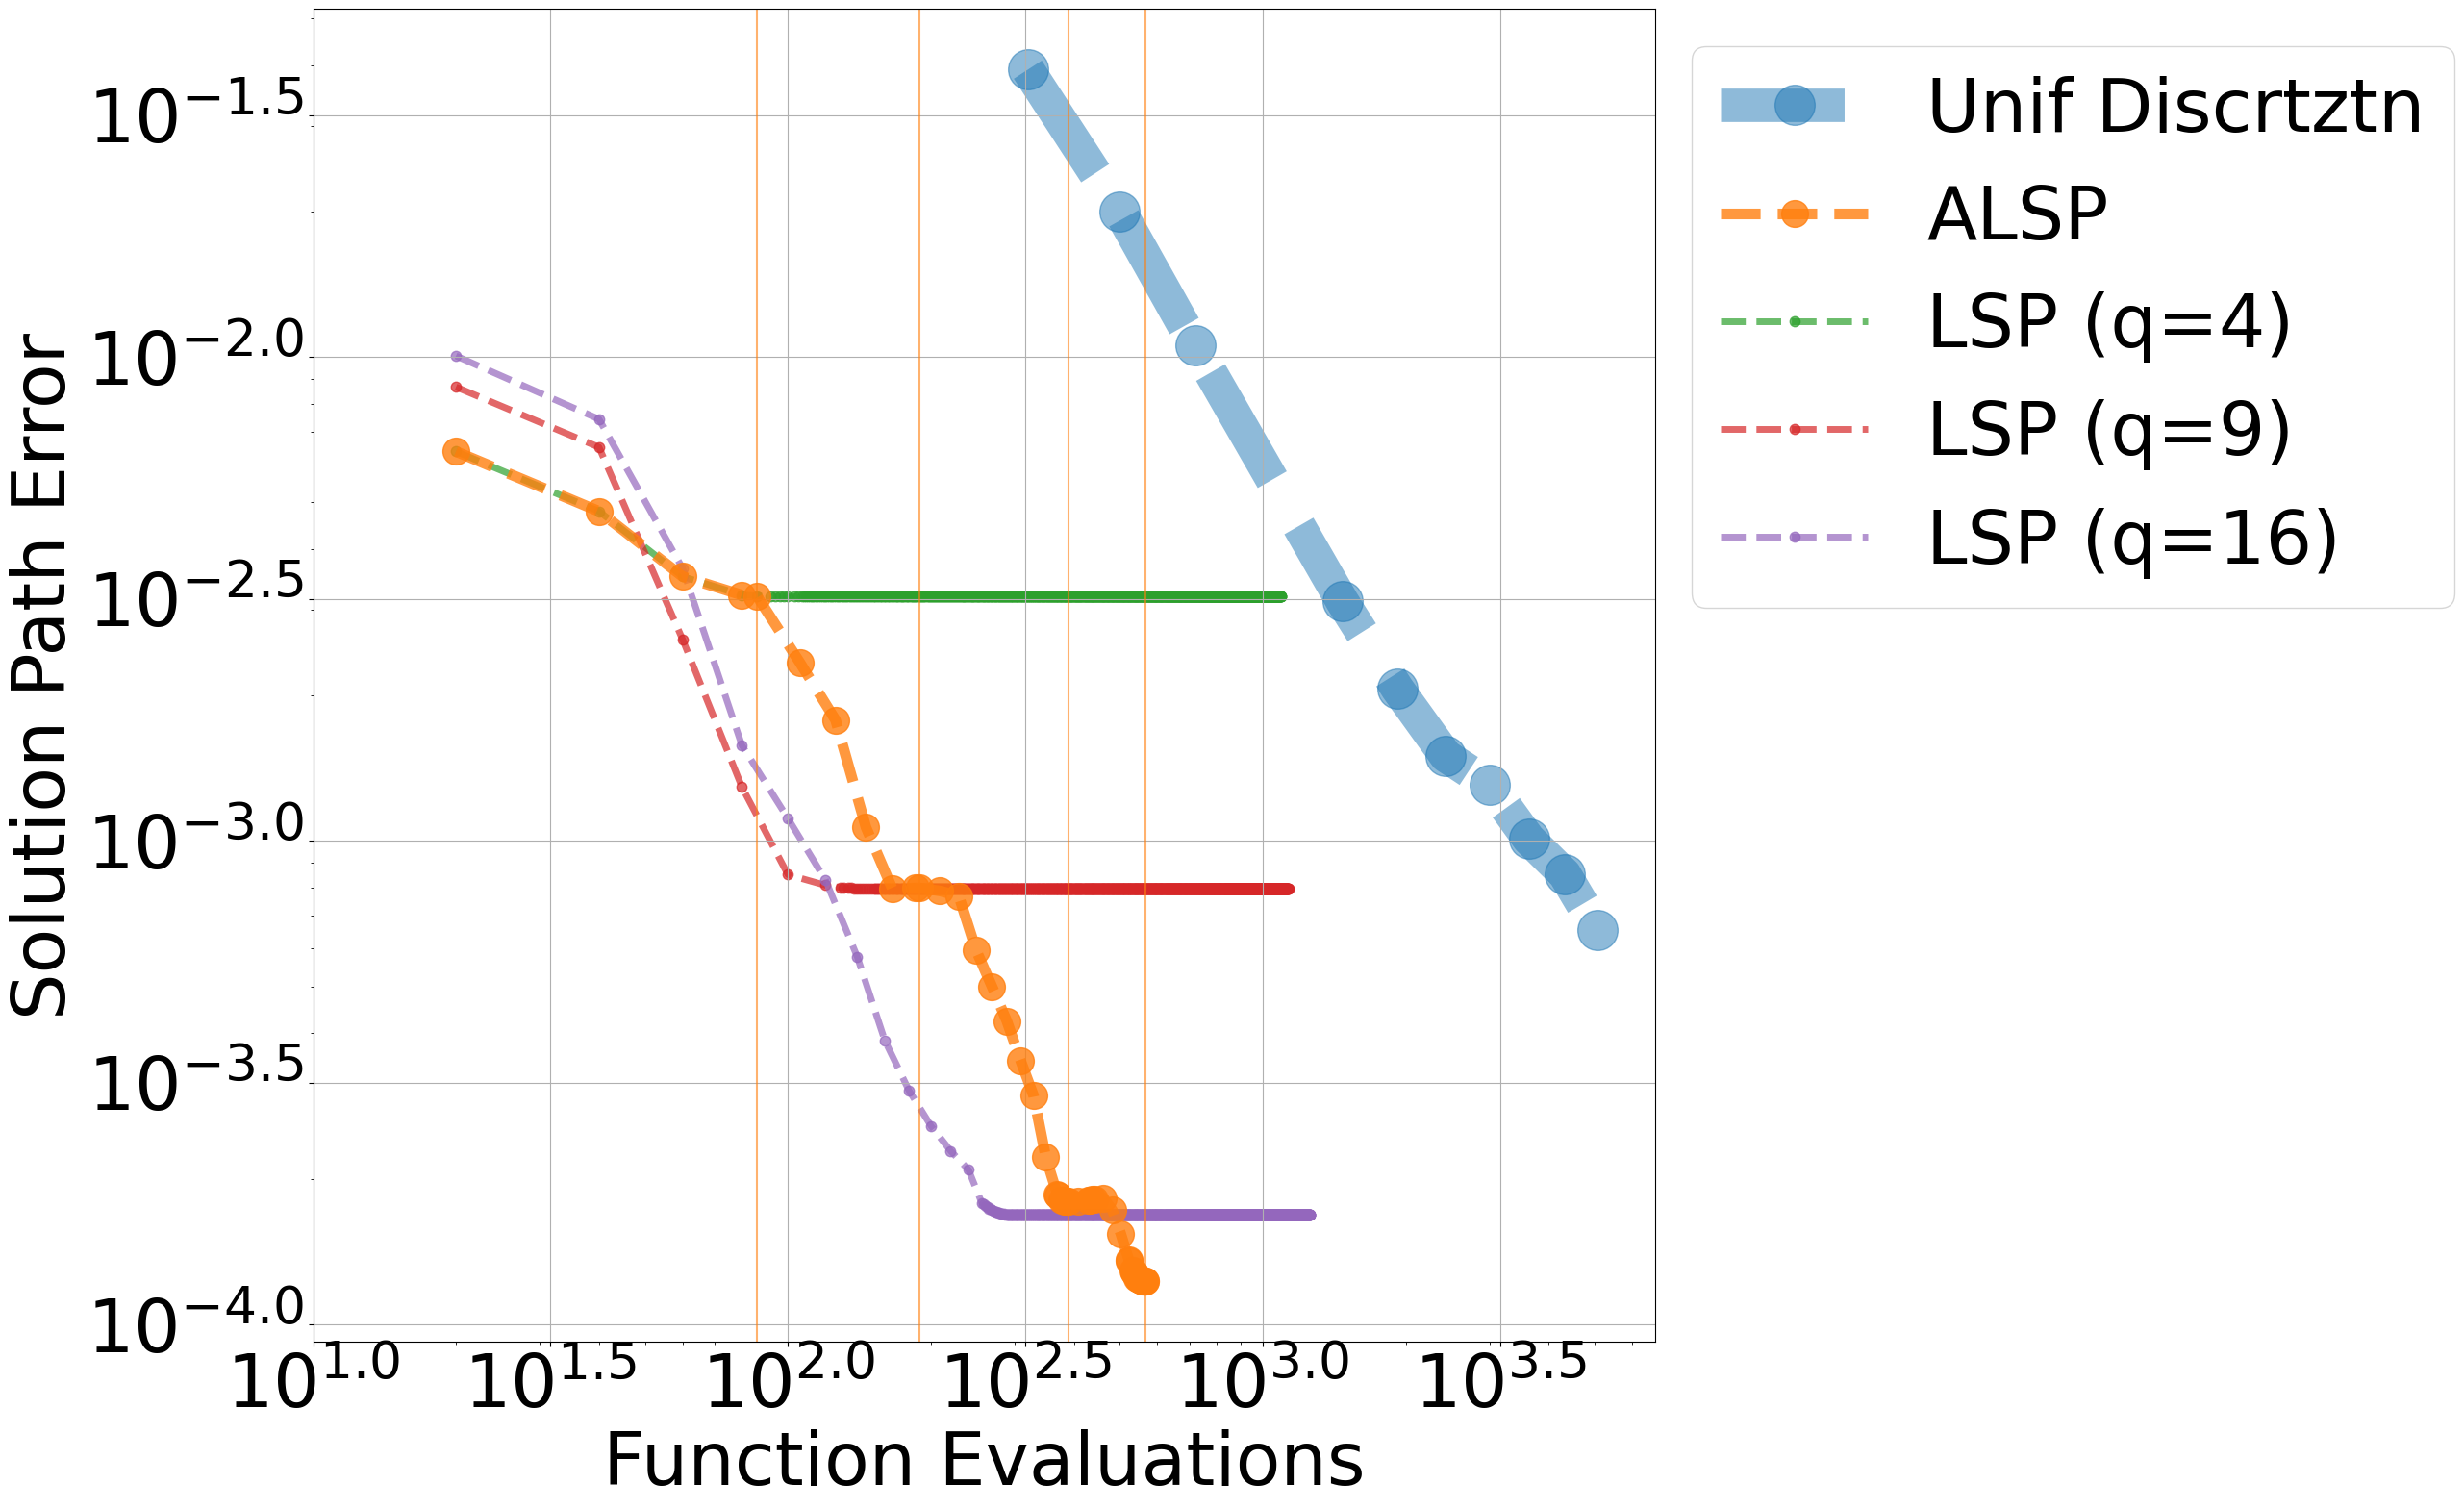

In [35]:
# plot result of learning the solution path for every 100 gradient calls
plt.figure(figsize=(18,18))
plt.plot((num_func_eval_NGS_exact[:len(num_func_eval_NGS_exact)-6]), (sup_err_NGS_exact[:len(num_func_eval_NGS_exact)-6]), '--o', linewidth=25, markersize=30, label = "Unif Discrtztn", alpha=0.5, zorder=0)
for break_itr in breaks:
    plt.axvline(x = num_func_eval_LSP_boosted[break_itr-1], color='tab:orange', alpha=0.6, zorder=2)
plt.plot((num_func_eval_LSP_boosted), (sup_err_LSP_boosted), '--o', linewidth=8, markersize=20, label = "ALSP", alpha=0.8, zorder=2)

plt.plot((num_itr_LSP_4), (sup_err_LSP_4), '--.', linewidth=5, markersize=15, label = "LSP (q=4)", alpha=0.7, zorder=1)
plt.plot((num_itr_LSP_9), (sup_err_LSP_9), '--.', linewidth=5, markersize=15, label = "LSP (q=9)", alpha=0.7, zorder=1)
plt.plot((num_itr_LSP_16), (sup_err_LSP_16), '--.', linewidth=5, markersize=15, label = "LSP (q=16)", alpha=0.7, zorder=1)
# plt.plot((num_itr_LSP_25), (sup_err_LSP_25), '--.', linewidth=5, markersize=15, label = "LSP (q=25)", alpha=0.7, zorder=1)


# Set global font size
mpl.rcParams['font.size'] = 55

font_size = 55
# Tick labels
plt.yscale('log')
plt.xscale('log')

y_ticks = np.arange(-4, -1, .5)  # Tick positions in powers of 10
y_tick_labels = [f'$10^{{{t}}}$' for t in y_ticks]  # LaTeX-formatted labels

x_ticks = np.arange(1, 4, .5)  # Tick positions in powers of 10
x_tick_labels = [f'$10^{{{t}}}$' for t in x_ticks]  # LaTeX-formatted labels

# Set the y-ticks and labels
# plt.yticks()

# plt.xticks(fontsize=font_size)
plt.xticks(10**x_ticks, x_tick_labels, fontsize=font_size)
# plt.yticks(fontsize=font_size)
plt.yticks(10**y_ticks, y_tick_labels, fontsize=font_size)
plt.xlim(0, )
# Legend, if applicable
plt.legend(fontsize=font_size, loc='upper left', bbox_to_anchor=(1, 1))

plt.xlabel('Function Evaluations', fontsize=font_size)
plt.ylabel('Solution Path Error', fontsize=font_size)
plt.grid(True)

# Show the plot
# plt.show()

plt.savefig("itr_exact_2d.png")